In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import *
from gbm import *

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
last_id = 287
backtest_start = 55
backtest_end = 65

In [5]:
prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _, discounts = MultivariateGBMSimulationTS(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30, implied_volatility=True)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=discounts, risk_neutral=False, verbose=False))
    
    prices.append(np.mean(payoff))



100%|██████████| 100/100 [00:02<00:00, 37.00it/s]


1.009727911943209


100%|██████████| 100/100 [00:02<00:00, 38.48it/s]


1.0093396018362275


100%|██████████| 100/100 [00:02<00:00, 37.15it/s]


1.009583707576013


100%|██████████| 100/100 [00:02<00:00, 37.22it/s]


1.009706369666431


100%|██████████| 100/100 [00:02<00:00, 33.98it/s]


1.0095594750784984


100%|██████████| 100/100 [00:02<00:00, 37.72it/s]


1.009376966086521


100%|██████████| 100/100 [00:02<00:00, 35.83it/s]


1.009480812215689


100%|██████████| 100/100 [00:03<00:00, 32.66it/s]


1.0103886405981783


100%|██████████| 100/100 [00:02<00:00, 37.97it/s]


1.0107773710626515


100%|██████████| 100/100 [00:02<00:00, 37.74it/s]


1.0114296992672716


100%|██████████| 10/10 [00:39<00:00,  3.98s/it]


In [6]:
price_1 = [prices.copy()]
price_1

[[995.5581868497072,
  987.53720111345,
  1030.0903180070234,
  1028.6466001780595,
  1024.082880652545,
  1045.7502065956533,
  1036.1678439075952,
  1052.8874924526024,
  1043.6675408817464,
  1046.8293824562084]]

In [8]:
prices = []
for current_id in tqdm(range(backtest_start, backtest_end)):
    payoff = []
    result, _, discounts = MultivariateGBMSimulationTS(s0=close.iloc[current_id], n_paths=100, current_id=current_id, window_size=30, implied_volatility=False)
    
    old_path_rog = combined_df['ROG_Last_Price'].iloc[:current_id]
    old_path_cfr = combined_df['CFR_Last_Price'].iloc[:current_id]
    old_path_zurn = combined_df['ZURN_Last_Price'].iloc[:current_id]

    for i in range(result.shape[1]):
        path_rog = np.append(old_path_rog, result[0][i].flatten())
        path_cfr = np.append(old_path_cfr, result[1][i].flatten())
        path_zurn = np.append(old_path_zurn, result[2][i].flatten())

        payoff.append(payoff_func(path_rog, path_cfr, path_zurn, combined_df.iloc[current_id]['Date'], risk_free=discounts, risk_neutral=False, verbose=False))
    
    prices.append(np.mean(payoff))



100%|██████████| 100/100 [00:02<00:00, 39.13it/s]


1.009727911943209


100%|██████████| 100/100 [00:02<00:00, 36.98it/s]


1.0093396018362275


100%|██████████| 100/100 [00:03<00:00, 33.00it/s]


1.009583707576013


100%|██████████| 100/100 [00:02<00:00, 34.10it/s]


1.009706369666431


100%|██████████| 100/100 [00:03<00:00, 29.99it/s]


1.0095594750784984


100%|██████████| 100/100 [00:02<00:00, 38.02it/s]


1.009376966086521


100%|██████████| 100/100 [00:02<00:00, 40.22it/s]


1.009480812215689


100%|██████████| 100/100 [00:03<00:00, 30.23it/s]


1.0103886405981783


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


1.0107773710626515


100%|██████████| 100/100 [00:04<00:00, 21.22it/s]


1.0114296992672716


100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


In [9]:
price_1.append(prices.copy())

d:\mh4518_simulation_in_fin\notebooks\../utils\utils.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  real_price['Date'] = pd.to_datetime(real_price['Date'], dayfirst=True)


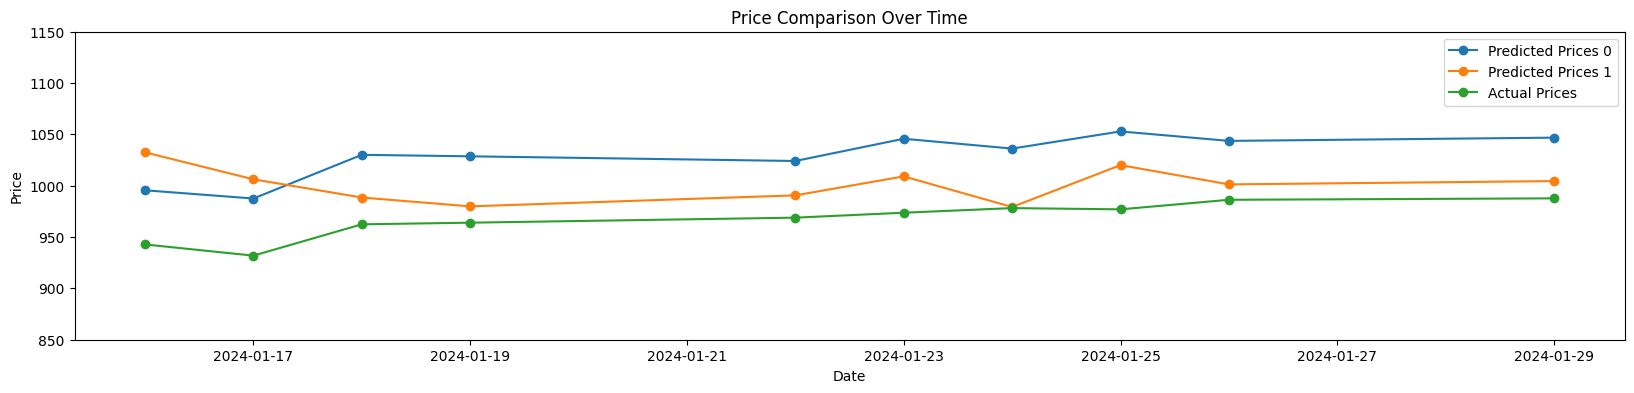

In [10]:
combined_df = retrieve_data()

evaluation_plot(
    backtest_start,
    backtest_end,
    combined_df,
    price_1
    )

In [16]:
combined_df.iloc[50:60, :]

,Date,ROG_Last_Price,ROG_IVOL,CFR_Last_Price,CFR_IVOL,ZURN_Last_Price,ZURN_IVOL,Risk_Free_Rate
50,2024-01-09,252.25,17.3357,112.75,27.6846,439.0,13.5786,1.3758
51,2024-01-10,253.90,17.1207,112.30,27.6068,435.9,14.2341,1.3806
52,2024-01-11,250.60,17.2272,110.45,27.5545,432.8,13.7492,1.3729
53,2024-01-12,252.50,16.9516,110.25,27.8636,436.9,13.6311,1.3376
54,2024-01-15,250.85,17.1497,109.85,27.6874,439.0,13.5356,1.3421
55,2024-01-16,250.10,17.1424,108.00,27.7113,442.4,13.1857,1.3382
56,2024-01-17,247.25,17.2372,105.40,28.9632,434.3,13.7452,1.3608
57,2024-01-18,245.95,17.2125,116.35,26.0605,430.2,14.1039,1.3585
58,2024-01-19,244.10,16.8093,116.40,27.2070,434.2,13.3972,1.3713
59,2024-01-22,247.80,16.9903,117.65,24.8685,441.8,12.0093,1.3693
